# Исследование компьютерных игр

Необходимо выявить определяющие успешность игр, закономерности для интернет-магазина «Стримчик» на основании данных из открытых источников (исторических данных о продажах игр, оценок пользователей и экспертов, сведений о жанрах и платформах) с целью выявления потенциально популярного продукта и планирования рекламных кампаний.

##  Изучение общей информации

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from scipy import stats as st

In [2]:
#откроем файл games.csv, укажем знаков после запятой и что первая строка является заголовком
data = pd.read_csv('/datasets/games.csv', header = 0)
pd.set_option('display.float_format', '{:,.2f}'.format)

data.head(10) #выведем первые 10 строк таблицы

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN


В стобце Name встречаются названия игр с платформами, хотя платформа указана в отдельном столбце.<br>
Столбец с годом выхода игры требует изменения формата значений.<br>
Требуется проверить значения в столбце Rating.<br>
Проверить категории в столбцах Platform и Genre.<br>
Привести заголовки столбцов, названия игр, платформы и жарны к нижнему регистру.

In [3]:
#выведем общую информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Общая информация показывает, что в данных имеются явные пропуски. Есть проблемы с типом данных в user_score - необходимо проверить причину появления такого типа.

### Вывод
Изучение общей информации о датафрейме показало, что требуется выполнить следующие действия:
- привести к нижнему регистру заголовки столбцов и значения в некоторых столбцах;
- указать год выпуска в корректном формате;
- проверить унифицированность категорий жанров и платформ, при необходимости внести изменения
- проанализировать данные в столбце "Рейтинг"
- проверить датафрейм на наличие явных дубликатов.

## Предварительная обработка данных

Приведем к нижнему регистру названия столбцов

In [4]:
data.columns = data.columns.str.lower()
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
5,Tetris,GB,"1,989.00",Puzzle,23.20,2.26,4.22,0.58,nan,NaN,NaN
6,New Super Mario Bros.,DS,"2,006.00",Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,"2,006.00",Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,"2,009.00",Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,"1,984.00",Shooter,26.93,0.63,0.28,0.47,nan,NaN,NaN


In [5]:
# повторим операции для названия, платформ и жанров
data['name'] = data['name'].str.lower() 
data['genre'] = data['genre'].str.lower() 
data['platform'] = data['platform'].str.lower() 

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,"2,006.00",sports,41.36,28.96,3.77,8.45,76.00,8,E
1,super mario bros.,nes,"1,985.00",platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,mario kart wii,wii,"2,008.00",racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,wii sports resort,wii,"2,009.00",sports,15.61,10.93,3.28,2.95,80.00,8,E
4,pokemon red/pokemon blue,gb,"1,996.00",role-playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


### Преобразование типов данных

Преобразуем данные в столбце Год в формат datetime, чтобы избавиться от дробной части и для дальнейшей корректной группировки данных

*(можно было бы сделать просто int, но мне интересно было сделать именно через дату)*

In [6]:
try:
    data['year_of_release'] = pd.to_datetime(data['year_of_release'].astype(int), errors='coerce')
except:
    print('есть пропуски, преобразование невозможно')

есть пропуски, преобразование невозможно


In [7]:
#посчитаем количество пропусков в годе выпуска и поверим, можно ли их безболезненно удалить
print('Пропусков в столбце с годом:', data['year_of_release'].isna().sum())

Пропусков в столбце с годом: 269


С учетом 16715 вхождений во весь датафрейм, пропуски в столбце year_of_release составляют чуть более 1,5%. Можем удалить строки с такими пропусками.

In [8]:
data = data.dropna(subset=['year_of_release'])

In [9]:
#проверим себя
print('Пропусков в столбце с годом:', data['year_of_release'].isna().sum())

Пропусков в столбце с годом: 0


In [10]:
#повторим попытку преобразовать дробное число в год
try:
    data['year_of_release'] = pd.to_datetime(data['year_of_release'].astype(int).astype(str) + "-01-01")
except:
    print('есть пропуски, преобразование невозможно')

In [11]:
#оставим от полученной даты только год
data['year_of_release'] = pd.DatetimeIndex(data['year_of_release']).year

In [12]:
#проверим себя
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,nan,NaN,NaN


### Обработка пропусков

In [13]:
#проверим, где еще остались пропуски
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

Две строки с пропусками в названиях и жанре, которые также можно удалить (возможно имеет место ошибка в выгрузке, т.к. данные брались из открытых источников).<br>
И большое количество строк с пропусками с рейтингами и оценками. Пропуски могут быть связаны с тем, что некоторые игры могли не попасть в рейтинги, составленные по отдельным жанрам, платформам, тематике и пр. <br>
Пропуски в оценках заменить на 0 нельзя, так 0 - это тоже оценка. Оставим пропуски в оценках. <br>
Пропуски в рейтингах можно заменить на unknown - не определено. Данные брались из открытых источников, возможно эти игры просто не были прорейтингованы ассоциацией.

In [14]:
# удалим пропуски в столбце name и проверим, не связаны ли эти пропуски с жанрами
data = data.dropna(subset=['name'])

if data['genre'].isna().sum() == 0:
    print('Пропуски в столбце с жанром тоже удалены')

Пропуски в столбце с жанром тоже удалены


In [15]:
#проверим данные в столбце с рейтингом
data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

Незначительную часть датасета составляют игры с рейтингами EC, K-A, AO, RP. Также на предыдущем шаге мы выяснили, что в этом столбце есть пропуски. Заменим эти пропуски на временное значение.

In [16]:
#заменим пропуски на значение "неизвестно"
data['rating'] = data['rating'].fillna('unknown')

In [17]:
#проверим еще раз пропуски после обработки
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

Из технической документации нам известно, что в столбце user_score есть строки со значениями tbd (To Be Determined - "Будет определено"). Посчитаем их количество. 

In [18]:
print('Строк со значением tbd:', (data[data['user_score'] == 'tbd']['user_score']).count())

Строк со значением tbd: 2376


In [19]:
#Изучим эти строки
display((data[data['user_score'] == 'tbd']).head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010,sports,3.45,2.59,0.00,0.66,nan,tbd,E
301,namco museum: 50th anniversary,ps2,2005,misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+
520,zumba fitness 2,wii,2011,sports,1.51,1.03,0.00,0.27,nan,tbd,T
645,udraw studio,wii,2010,misc,1.65,0.57,0.00,0.20,71.00,tbd,E
718,just dance kids,wii,2010,misc,1.52,0.54,0.00,0.18,nan,tbd,E
726,dance dance revolution x2,ps2,2009,simulation,1.09,0.85,0.00,0.28,nan,tbd,E10+
821,the incredibles,gba,2004,action,1.15,0.77,0.04,0.10,55.00,tbd,E
881,who wants to be a millionaire,pc,1999,misc,1.94,0.00,0.00,0.00,nan,tbd,E
1047,tetris worlds,gba,2001,puzzle,1.25,0.39,0.00,0.06,65.00,tbd,E
1048,imagine: teacher,ds,2008,simulation,0.70,0.82,0.00,0.19,nan,tbd,E


Для игр со значением пользовательских оценок зачастую не выставлены также оценки от критиков. 

Возможно, было продано слишком мало копий или платформа для игры быстро потеряла актуальность, либо год выхода игры таков, что ещё не существовали специализированные сайты, на которых публиковались бы оценки и рейтинги, либо игра выпускалась только на одном языке (японском), а в выборке учитывались только международные издания. 

Заменим значения tbd в столбце user_score просто на NaN.

In [20]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [21]:
#проверим себя, выведем строки на которых были tbn
data.loc[1047:1048]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1047,tetris worlds,gba,2001,puzzle,1.25,0.39,0.00,0.06,65.00,nan,E
1048,imagine: teacher,ds,2008,simulation,0.70,0.82,0.00,0.19,nan,nan,E


In [22]:
#проверим, что по типам данных замена прошла корректно - значение должно поменяться с object на float64
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 2.1+ MB


### Категоризация
Изучим значения в столбце с жанрами.

In [23]:
data['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy'], dtype=object)

Повторяющихся категорий не обнаружено. Оставим как есть.

In [24]:
#повторим проверку для платформ
data['platform'].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

В платформах повторов не обнаружено

### Подсчет продаж

In [25]:
#создадим столбец с общей суммой продаж
data['all_sales'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,nan,nan,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,nan,nan,unknown,31.38


### Проверка на дубликаты

Проверим получившуюся таблицу на дубликаты.

In [26]:
if data.duplicated().sum() == 0:
    print('Явных дубликатов не обнаружено')
else:
    print(f'Обнаружено {data.duplicated().sum()} дубликатов')

Явных дубликатов не обнаружено


### Вывод
В результате предобработки данных было сделано следующее:
- заголовки столбцов, данные в текстовых столбцах приведены к нижнему регистру;
- изменен формат данных для столбца, содержащем год выхода игры;
- проверены категории в столбцах Жанр и Платформа;
- значения tbn в user_score заменены на NaN;
- пропуски в столбце rating заменены на unknown;
- посчитана сумма продаж по всем регионам для каждой игры;
- проведена проверка на дубликаты, явных дубликатов не обнаружено.

## Исследовательский анализ данных

### Количество игр по годам

In [27]:
#сгруппируем таблицу по годам
games_by_year = (
    data.groupby('year_of_release')['name']
    .count()
    .reset_index()
)
games_by_year.style.background_gradient('coolwarm', subset='name')

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Судя по сгруппированной таблице, наибольшее число выпущенных игр лежит в диапазоне 2005-2012 годов.

Визуализируем полученные данные.

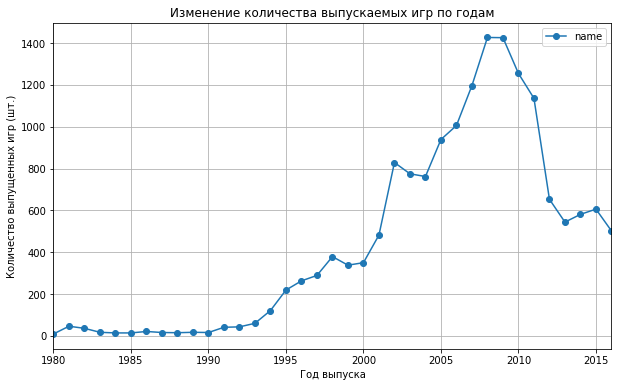

In [28]:
#построим график, где каждой точке соотвествует год выпуска
games_by_year.plot(x='year_of_release', y='name', grid=True, style="o-", figsize=(10,6))
plt.title('Изменение количества выпускаемых игр по годам')
plt.ylabel('Количество выпущенных игр (шт.)')
plt.xlabel('Год выпуска')
plt.show()

Судя по графику с 2005 года начался устойчивый рост количества выпускаемых игр. В 2012 году количество релизов в выборке снизилось примерно до тех же показателей. Максимальное количество выпущенных игр зафиксировано в 2008-2009 годах.

Если сделать, предоположение, что рост количества выпускаемых игр цикличен, то, начиная с 2013 года можно ожидать семилетний рост количества выпущенных продуктов.

### Продажи по платформам
 
Выберем платформы с наибольшими суммарными продажами.

In [29]:
#сгруппируем данные по платформам, суммируем продажи и отсортируем их
top_platforms = (
    data.groupby('platform')
    .agg({'all_sales': 'sum'})
    .sort_values(by ='all_sales', ascending=False)
    .reset_index()
)

#выведем платформы по рейтингу продаж
top_platforms.style.background_gradient('coolwarm', subset='all_sales')

,platform,all_sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.34
3,wii,891.18
4,ds,802.78
5,ps,727.58
6,ps4,314.14
7,gba,312.88
8,psp,289.53
9,3ds,257.81


Из группировки видно, что после платформы PS общее число продаж резко падает и продолжает дальше незначительно убывать.
Следовательно, дальнейший анализ можно проводить по 6 платформам с наибольшим числом продаж.

In [30]:
#составим список из топ-6
top_platforms = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']

In [31]:
#в новую переменную сохраним только те строки, в которых значение платформы попадает в топ-6 по продажам
top_6_platforms = data.query('platform in @top_platforms').reset_index(drop=True)
top_6_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
2,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
3,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.00,8.50,E,29.80
4,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.00,6.60,E,28.91


In [32]:
#построим сводную таблицу для игр в топ-6 платформ и посмотрим на распределение по годам
top_6_platforms.pivot_table(
                index='year_of_release', 
                columns='platform', 
                values='all_sales',
                aggfunc='count',
                fill_value=0)


platform,ds,ps,ps2,ps3,wii,x360
year_of_release,,,,,,
1985,1,0,0,0,0,0
1994,0,17,0,0,0,0
1995,0,99,0,0,0,0
1996,0,164,0,0,0,0
1997,0,188,0,0,0,0
1998,0,248,0,0,0,0
1999,0,200,0,0,0,0
2000,0,160,82,0,0,0
2001,0,91,185,0,0,0


На сводной таблице обнаружено подозрительное значение для платформы ds - игра, датированная 1985 годом, хотя старт этой консоли - 2004 год.

По распределению данных сводной таблицы, видно, что каждая платформа существует несколько лет, затем продажи стремяться к 0. Проверим это, построив график.

In [33]:
#сначала уберем обнаруженную аномалию
top_6_platforms = top_6_platforms.query('year_of_release >= 1994').reset_index(drop=True)

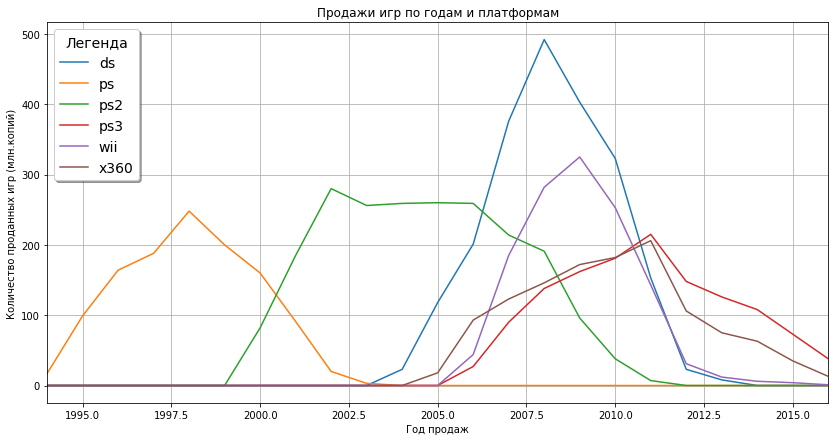

In [34]:
#построим сводную таблицу и график на ее основе
(
    top_6_platforms.pivot_table(
                             index='year_of_release', 
                             columns='platform', 
                             values='all_sales',
                             aggfunc='count',
                             fill_value=0
                )
                .plot(grid=True, style="-", figsize=(14,7))
)
plt.title('Продажи игр по годам и платформам')
plt.ylabel('Количество проданных игр (млн.копий)')
plt.xlabel('Год продаж')
plt.legend(loc='upper left', fontsize=14, title='Легенда', title_fontsize=14, shadow=True, frameon=True, facecolor='w')
plt.show()

На графике видно, что игры для каждой плафтормы продаются около 10 лет. Пик продаж приходится на 5-7 год выпуска и далее продажи идут на спад.

### Актуальный период и платформы

В результате предыдущих шагов, мы определили, что для того, чтобы в 2017 году продажи игр принесли прибыль, необходимо, чтобы консоли уже существовали максимум 5 лет, а продажи игр для них еще не закончились. Исходя из количества выпущенных игр, можно ожидать также в течение 5 лет рост количества выпускаемых игровых продуктов.

Следовательно, актуальным будет период, начиная с 2011 года.

Посмотрим, какие платформы соотвествуют этим критериям.

In [100]:
#построим сводную таблицу, и определим, какие платформы только начали продажи, а какие уже завершают

#выпущено игр по годам
(
    data.query('year_of_release >= 2011')
        .pivot_table(
                index='year_of_release', 
                columns='platform', 
                values='name',
                aggfunc='count',
                fill_value=0
               )
)

platform,3ds,ds,pc,ps2,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,,
2011,116,153,139,7,215,0,139,18,143,0,206,0
2012,93,23,61,0,148,0,106,53,31,32,106,0
2013,91,8,38,0,126,16,54,63,12,42,75,19
2014,80,0,47,0,108,75,10,100,6,31,63,61
2015,86,0,50,0,73,137,3,110,4,28,35,80
2016,46,0,54,0,38,164,0,85,1,14,13,87


In [158]:
#продажи игр по годам
(
    data.query('year_of_release >= 2011')
        .pivot_table(
                index='year_of_release', 
                columns='platform', 
                values='all_sales',
                aggfunc='sum',
                fill_value=0
               )
)

platform,3ds,ds,pc,ps2,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,,
2011,63.20,26.18,35.03,0.45,156.78,0.00,17.82,4.63,59.65,0.00,143.84,0.00
2012,51.36,11.01,23.22,0.00,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2013,56.57,1.54,12.38,0.00,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,0.00,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,0.00,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,0.00,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


Исходя из данных сводной таблицы, наиболее актуальными для исследования являются платформы pc, ps4, xone. Постепенное снижение продаж наблюдается у 3ds, psv, ps3, wiiu, x360. 

Платформы ds, ps2 к 2016 году перестали выпускать новые игры, а продажи по ним равны 0. Наблюдается резкое снижение продаж к 2016 году у платформ psp, wii.

Из технического описания мы знаем, что данные за 2016 год могут быть неполными. Для более объективного анализа, срежем нижнюю границу до 2015 года. 
По состоянию на этот год, 3ds и psv еще пока не склонны терять в продажах.

Таким образом, в актуальный список платформ попадают 3ds, psv, pc, ps4, xone.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


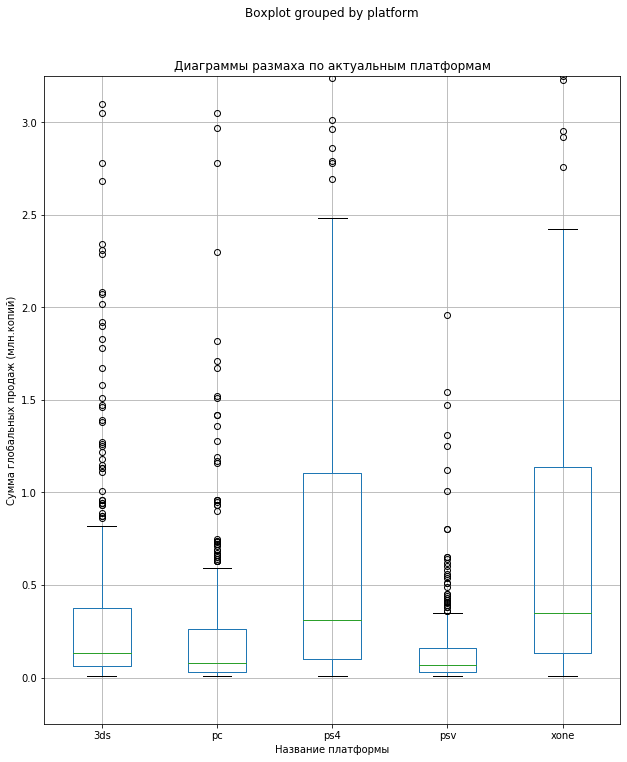

In [37]:
#построим диаграммы размаха продаж для выбранного актуального периода и наиболее перспективных платформ
top_actual_platforms = ['3ds', 'pc', 'ps4', 'psv', 'xone']
(    
    data.query('2015 >= year_of_release >= 2011 & platform in @top_actual_platforms')
        .boxplot(column='all_sales', by='platform', figsize=(10,12))
)
plt.title('Диаграммы размаха по актуальным платформам')
plt.ylabel('Сумма глобальных продаж (млн.копий)')
plt.xlabel('Название платформы')
plt.ylim(-0.25,3.25)
plt.show()

Из диаграмм размаха можно сделать следующие выводы:
- для каждой платформы есть ряд игр, продажи которых принесли больше медианного значения;
- нулевая точка отсчета связана тем, что в выборке есть платформы как уже существующие на рынке ранtе, так и стартовавшие позже выбранной нижней годовой границы;
- медианные значения продаж по платформам лежат в пределах около 0,25 млн.копий и менее;
- лучше всего продаются игры на ps4, вторая платформа по лидерству продаж - xbox one, а хуже всего продаются игры на psv;
- при этом медианное значение у xbox one выше, чем у ps4.

У каждой платформы есть значительное количество успешных продуктов, принесших большую прибыль. Такие бестселлеры отображаются на диаграмме точками, выше последней горизонтальной черты. Все, что лежит между нулевой точкой отсчета (нижняя горизонтальная черта) и верхней горизонтальной чертой - это диапазон, в который попадают типичные продажи игр для данной платформы. Бестселлеры есть у каждой консоли и могут существенно исказить данные при подсчете средних продаж. Поэтому для построения прогнозов лучше ориентироваться на медианные значения. Из диаграммы видно, что медианные значения лежат примерно в одном диапазоне, тогда как количество продаж бестселлеров-выбросов очень разнообразно

### Анализ платформы Xbox One

Рассмотрим, как влияют на продажи внутри платформы xbox one отзывы пользователей и критиков. <br>
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 
В выборке учтем, что продажи игр для xone стартовали только в 2013 году (см.сводную таблицу по актуальному периоду), а данные за 2016 год могут быть не полными.

In [38]:
#сохраним в новую переменную выборку только по xone
platform_xone = data.query('2015 >= year_of_release >= 2013 & platform == "xone"')
platform_xone.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
count,160.00,160.00,160.00,160.00,160.00,109.00,116.00,160.00
mean,"2,014.38",0.49,0.26,0.00,0.08,73.05,6.48,0.83
std,0.69,0.73,0.40,0.01,0.11,13.56,1.29,1.18
min,"2,013.00",0.00,0.00,0.00,0.00,20.00,2.10,0.01
25%,"2,014.00",0.08,0.04,0.00,0.01,66.00,5.77,0.13
50%,"2,014.50",0.22,0.11,0.00,0.03,76.00,6.70,0.35
75%,"2,015.00",0.60,0.28,0.00,0.09,82.00,7.30,1.14
max,"2,015.00",4.59,2.19,0.04,0.68,97.00,9.20,7.39


Проверим полученную выборку на пропуски.

In [39]:
print('Пропусков в оценках пользователей:', platform_xone['user_score'].isna().sum())
print('Пропусков в оценках критиков:', platform_xone['critic_score'].isna().sum())

Пропусков в оценках пользователей: 44
Пропусков в оценках критиков: 51


Пропуски есть в обеих оценках. Для корреляционного анализа необходимо, чтобы пар значений было не менее 35. Если удалить пропуски в оценках, пар значений будет достаточно для оценки. 

In [40]:
#удалим пропуски
platform_xone = platform_xone.dropna(subset=['user_score'])
platform_xone = platform_xone.dropna(subset=['critic_score'])

In [41]:
#проверим себя
print('Пропусков в оценках пользователей:', platform_xone['user_score'].isna().sum())
print('Пропусков в оценках критиков:', platform_xone['critic_score'].isna().sum())
print('Новый размер таблицы составил:', platform_xone.shape)

Пропусков в оценках пользователей: 0
Пропусков в оценках критиков: 0
Новый размер таблицы составил: (107, 12)


По стандартному отклонению, а также минимум и максимуму в данных видно, что существует большое количество выбросов, которые могут повлиять на корректность анализа. Выбросы в данных надо исключить из корреляционного анализа, но пренебрегать ими нельзя - так как причиной выброса могут стать не только неверно занесённые данные, но внутренние причины процесса, которые могут дать полезную информацию.

Исходя из диаграммеы рассеяния, видно, что существует много успешных продуктов для этой платформы, однако предел нормальных значений лежит в пределе около 1,6 млн. проданных копий. Остановимся на этой границе.

In [42]:
platform_xone = platform_xone.query('all_sales <= 1.6')

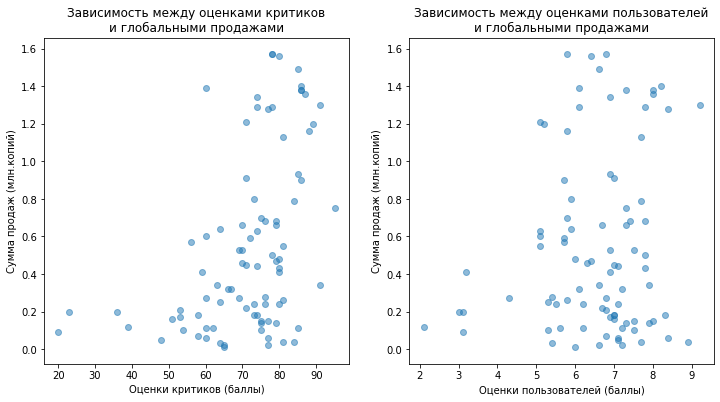

In [43]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.title.set_text('Зависимость между оценками критиков\nи глобальными продажами')
ax2.title.set_text('Зависимость между оценками пользователей\nи глобальными продажами')

ax1.set_ylabel('Сумма продаж (млн.копий)')
ax1.set_xlabel('Оценки критиков (баллы)')

ax2.set_ylabel('Сумма продаж (млн.копий)')
ax2.set_xlabel('Оценки пользователей (баллы)')

ax1.scatter(platform_xone['critic_score'], platform_xone['all_sales'], alpha=0.5)
ax2.scatter(platform_xone['user_score'], platform_xone['all_sales'], alpha=0.5)

plt.show()

In [44]:
print('Для платформы 3ds, по данным без учета выбросов и аномалий, коэффициент корреляции:\nмежду суммой продаж и оценками критиков составляет {:.2}'
                 .format(platform_xone['all_sales'].corr(platform_xone['critic_score'])))

Для платформы 3ds, по данным без учета выбросов и аномалий, коэффициент корреляции:
между суммой продаж и оценками критиков составляет 0.45


In [45]:
print('Для платформы xone, по данным без учета выбросов и аномалий, коэффициент корреляции:\nмежду суммой продаж и оценками пользователей составляет {:.2}'
                 .format(platform_xone['all_sales'].corr(platform_xone['user_score'])))

Для платформы xone, по данным без учета выбросов и аномалий, коэффициент корреляции:
между суммой продаж и оценками пользователей составляет 0.15


Полученные диаграммы мало информативны. На диаграммах рассеяния нет концентрированной направленной области. Видно разброс продаж и оценок. <br>
Существует умеренная положительная зависимость между высокой оценкой от критика и объемом продаж.<br>
Оценки пользователей более субъективны, зависимость между ними и объемом продаж низкая, что подтверждается слабым коэффициентом корреляции.

### Оценка для других платформ

Составим 4 для каждой платформы с учетом года начала продаж и выбросов. Проверим и удалим пропуски в данных.

#### 3ds

In [46]:
#сохраним в новую переменную выборку только по 3ds с учетом предела нормальных значений
platform_3ds = data.query('2015 >= year_of_release & platform == "3ds" & all_sales <= 0.75')
print('Начальный объем выборки:', platform_3ds.shape)

Начальный объем выборки: (404, 12)


In [47]:
#Проверим полученную выборку на пропуски.

print('Пропусков в оценках пользователей:', platform_3ds['user_score'].isna().sum())
print('Пропусков в оценках критиков:', platform_3ds['critic_score'].isna().sum())

Пропусков в оценках пользователей: 280
Пропусков в оценках критиков: 283


Действительно, пропусков больше половины. Для корреляционного анализа необходимо, чтобы пар значений было не менее 35. Если удалить пропуски в оценках, пар значений будет достаточно для оценки. 

In [48]:
#удалим пропуски
platform_3ds = platform_3ds.dropna(subset=['user_score'])
platform_3ds = platform_3ds.dropna(subset=['critic_score'])

In [49]:
#проверим себя
print('Пропусков в оценках пользователей:', platform_3ds['user_score'].isna().sum())
print('Пропусков в оценках критиков:', platform_3ds['critic_score'].isna().sum())
print('Новый размер таблицы составил:', platform_3ds.shape)

Пропусков в оценках пользователей: 0
Пропусков в оценках критиков: 0
Новый размер таблицы составил: (111, 12)


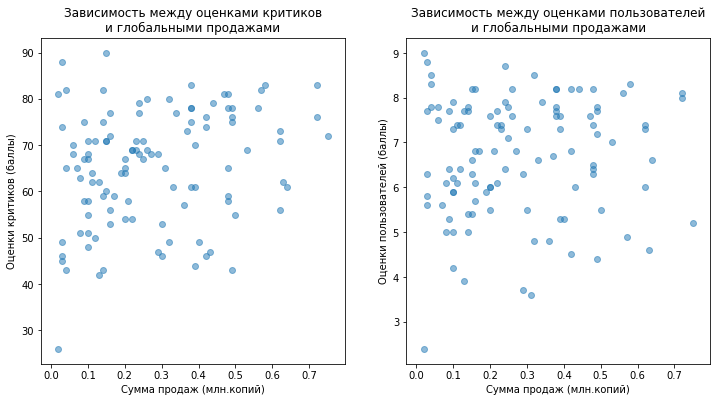

In [50]:
#Построим диаграммы
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.title.set_text('Зависимость между оценками критиков\nи глобальными продажами')
ax2.title.set_text('Зависимость между оценками пользователей\nи глобальными продажами')

ax1.set_xlabel('Сумма продаж (млн.копий)')
ax1.set_ylabel('Оценки критиков (баллы)')

ax2.set_xlabel('Сумма продаж (млн.копий)')
ax2.set_ylabel('Оценки пользователей (баллы)')

ax1.scatter(platform_3ds['all_sales'], platform_3ds['critic_score'], alpha=0.5)
ax2.scatter(platform_3ds['all_sales'], platform_3ds['user_score'], alpha=0.5)

plt.show()

In [51]:
print('Для платформы 3ds, по данным без учета выбросов и аномалий, коэффициент корреляции:\nмежду суммой продаж и оценками критиков составляет {:.2}'
                 .format(platform_3ds['all_sales'].corr(platform_3ds['critic_score'])))

Для платформы 3ds, по данным без учета выбросов и аномалий, коэффициент корреляции:
между суммой продаж и оценками критиков составляет 0.24


In [52]:
print('Для платформы 3ds, по данным без учета выбросов и аномалий, коэффициент корреляции:\nмежду суммой продаж и оценками пользователей составляет {:.2}'
                 .format(platform_3ds['all_sales'].corr(platform_3ds['user_score'])))

Для платформы 3ds, по данным без учета выбросов и аномалий, коэффициент корреляции:
между суммой продаж и оценками пользователей составляет 0.057


Для платформы 3ds диаграммы рассеяния не отображают какую-либо зависимость. Слабые положительные коэффициенты корреляции это подтверждают. Коэффициент корреляции между оценками критиков и продажами больше, чем между пользовательскими оценками и продажами.

#### PC

In [53]:
#сохраним в новую переменную выборку по PC без учета выбросов
platform_pc = data.query('2015 >= year_of_release & platform == "pc" & all_sales <= 0.6')
print('Начальный объем выборки:', platform_pc.shape)

Начальный объем выборки: (797, 12)


In [54]:
print('Пропусков в оценках пользователей:', platform_pc['user_score'].isna().sum())
print('Пропусков в оценках критиков:', platform_pc['critic_score'].isna().sum())

Пропусков в оценках пользователей: 170
Пропусков в оценках критиков: 222


In [55]:
#удалим пропуски, так как данных достаточно
platform_pc = platform_pc.dropna(subset=['user_score'])
platform_pc = platform_pc.dropna(subset=['critic_score'])

In [56]:
#проверим себя
print('Новый размер таблицы составил:', platform_pc.shape)

Новый размер таблицы составил: (565, 12)


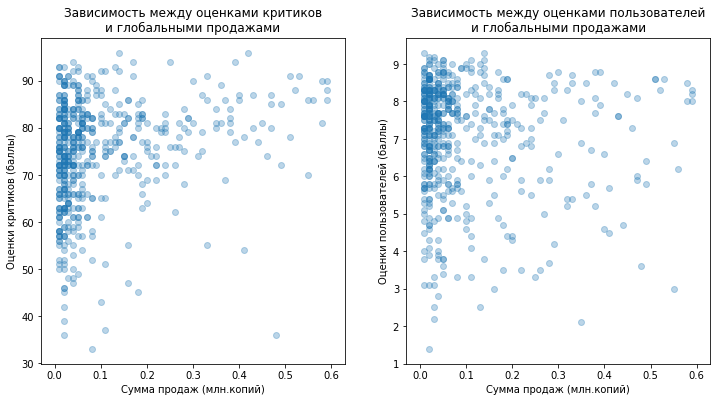

In [57]:
#Построим диаграммы
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.title.set_text('Зависимость между оценками критиков\nи глобальными продажами')
ax2.title.set_text('Зависимость между оценками пользователей\nи глобальными продажами')

ax1.set_xlabel('Сумма продаж (млн.копий)')
ax1.set_ylabel('Оценки критиков (баллы)')

ax2.set_xlabel('Сумма продаж (млн.копий)')
ax2.set_ylabel('Оценки пользователей (баллы)')

ax1.scatter(platform_pc['all_sales'], platform_pc['critic_score'], alpha=0.3)
ax2.scatter(platform_pc['all_sales'], platform_pc['user_score'], alpha=0.3)

plt.show()

In [58]:
print('Для платформы PC, по данным без учета выбросов и аномалий, коэффициент корреляции:\nмежду суммой продаж и оценками критиков составляет {:.2}'
                 .format(platform_pc['all_sales'].corr(platform_pc['critic_score'])))

Для платформы PC, по данным без учета выбросов и аномалий, коэффициент корреляции:
между суммой продаж и оценками критиков составляет 0.22


In [59]:
print('Для платформы PC, по данным без учета выбросов и аномалий, коэффициент корреляции:\nмежду суммой продаж и оценками пользователей составляет {:.2}'
                 .format(platform_pc['all_sales'].corr(platform_pc['user_score'])))

Для платформы PC, по данным без учета выбросов и аномалий, коэффициент корреляции:
между суммой продаж и оценками пользователей составляет -0.068


Для платформы PC зависимость продаж от оценок критиков также больше, чем от оценок пользователей, хотя также является слабой положительной. Коэффициент корреляции по оценкам пользователей стремиться к отрицательной очень слабой зависимости.

#### PSV

In [60]:
#сохраним в новую переменную выборку по PSV
platform_psv = data.query('2015 >= year_of_release & platform == "psv" & all_sales <= 0.4')
print('Начальный объем выборки:', platform_psv.shape)

Начальный объем выборки: (315, 12)


In [61]:
#Проверим полученную выборку на пропуски
print('Пропусков в оценках пользователей:', platform_psv['user_score'].isna().sum())
print('Пропусков в оценках критиков:', platform_psv['critic_score'].isna().sum())

Пропусков в оценках пользователей: 210
Пропусков в оценках критиков: 227


In [62]:
#удалим пропуски, т.к. данных достаточно
platform_psv = platform_psv.dropna(subset=['user_score'])
platform_psv = platform_psv.dropna(subset=['critic_score'])

In [63]:
#проверим себя
print('Новый размер таблицы составил:', platform_psv.shape)

Новый размер таблицы составил: (87, 12)


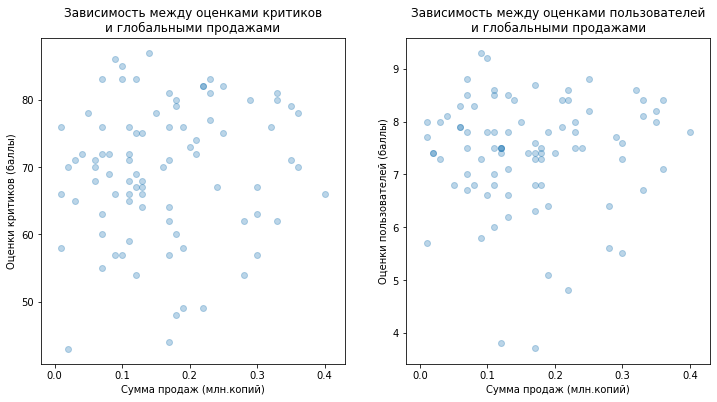

In [64]:
#Построим диаграммы
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.title.set_text('Зависимость между оценками критиков\nи глобальными продажами')
ax2.title.set_text('Зависимость между оценками пользователей\nи глобальными продажами')

ax1.set_xlabel('Сумма продаж (млн.копий)')
ax1.set_ylabel('Оценки критиков (баллы)')

ax2.set_xlabel('Сумма продаж (млн.копий)')
ax2.set_ylabel('Оценки пользователей (баллы)')

ax1.scatter(platform_psv['all_sales'], platform_psv['critic_score'], alpha=0.3)
ax2.scatter(platform_psv['all_sales'], platform_psv['user_score'], alpha=0.3)

plt.show()

In [65]:
print('Для платформы PC, по данным без учета выбросов и аномалий, коэффициент корреляции:\nмежду суммой продаж и оценками критиков составляет {:.2}'
                 .format(platform_psv['all_sales'].corr(platform_psv['critic_score'])))

Для платформы PC, по данным без учета выбросов и аномалий, коэффициент корреляции:
между суммой продаж и оценками критиков составляет 0.11


In [66]:
print('Для платформы PC, по данным без учета выбросов и аномалий, коэффициент корреляции:\nмежду суммой продаж и оценками пользователей составляет {:.2}'
                 .format(platform_psv['all_sales'].corr(platform_psv['user_score'])))

Для платформы PC, по данным без учета выбросов и аномалий, коэффициент корреляции:
между суммой продаж и оценками пользователей составляет 0.02


Для платформы PSV практически отсуствует зависимость между какими-либо оценками и суммами продаж. Возможно, портативная консоль - просто спецефический продукт, игры для которой редко оценивают.

#### PS4

In [67]:
#сохраним в новую переменную выборку по PS4
platform_ps4 = data.query('2015 >= year_of_release >= 2013 & platform == "ps4" & all_sales <= 2.5')
print('Начальный объем выборки:', platform_ps4.shape)

Начальный объем выборки: (200, 12)


In [68]:
#Проверим полученную выборку на пропуски

print('Пропусков в оценках пользователей:', platform_ps4['user_score'].isna().sum())
print('Пропусков в оценках критиков:', platform_ps4['critic_score'].isna().sum())

Пропусков в оценках пользователей: 68
Пропусков в оценках критиков: 70


In [69]:
#удалим пропуски, т.к. данных достаточно
platform_ps4 = platform_ps4.dropna(subset=['user_score'])
platform_ps4 = platform_ps4.dropna(subset=['critic_score'])

In [70]:
#проверим себя
print('Новый размер таблицы составил:', platform_ps4.shape)

Новый размер таблицы составил: (129, 12)


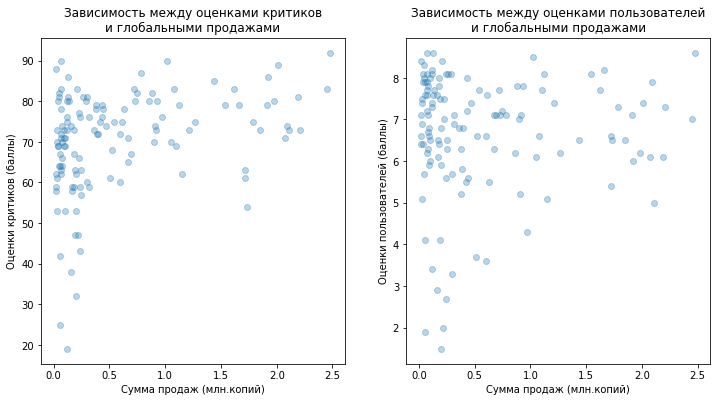

In [71]:
#Построим диаграммы
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.title.set_text('Зависимость между оценками критиков\nи глобальными продажами')
ax2.title.set_text('Зависимость между оценками пользователей\nи глобальными продажами')

ax1.set_xlabel('Сумма продаж (млн.копий)')
ax1.set_ylabel('Оценки критиков (баллы)')

ax2.set_xlabel('Сумма продаж (млн.копий)')
ax2.set_ylabel('Оценки пользователей (баллы)')

ax1.scatter(platform_ps4['all_sales'], platform_ps4['critic_score'], alpha=0.3)
ax2.scatter(platform_ps4['all_sales'], platform_ps4['user_score'], alpha=0.3)

plt.show()

In [72]:
print('Для платформы PC, по данным без учета выбросов и аномалий, коэффициент корреляции:\nмежду суммой продаж и оценками критиков составляет {:.2}'
                 .format(platform_ps4['all_sales'].corr(platform_ps4['critic_score'])))

Для платформы PC, по данным без учета выбросов и аномалий, коэффициент корреляции:
между суммой продаж и оценками критиков составляет 0.32


In [73]:
print('Для платформы PC, по данным без учета выбросов и аномалий, коэффициент корреляции:\nмежду суммой продаж и оценками пользователей составляет {:.2}'
                 .format(platform_ps4['all_sales'].corr(platform_ps4['user_score'])))

Для платформы PC, по данным без учета выбросов и аномалий, коэффициент корреляции:
между суммой продаж и оценками пользователей составляет 0.049


Для платформы PS4 зависимость продаж от оценок критиков умеренная положительная. Коэффициент корреляции по оценкам пользователей стремиться к очень слабой положительной зависимости.

In [74]:
#построим общую сравнительную таблицу корреляционных коэффициентов
compare_scores =  {
    'scores' : ['critic', 'user'],
    'xone_corr': [
      platform_xone['all_sales'].corr(platform_xone['critic_score']),
      platform_xone['all_sales'].corr(platform_xone['user_score'])
            ],
    '3ds_corr': [
      platform_3ds['all_sales'].corr(platform_3ds['critic_score']),
      platform_3ds['all_sales'].corr(platform_3ds['user_score'])
            ],
    'pc_corr': [
      platform_pc['all_sales'].corr(platform_pc['critic_score']),
      platform_pc['all_sales'].corr(platform_pc['user_score'])
            ],
    'psv_corr': [
      platform_psv['all_sales'].corr(platform_psv['critic_score']),
      platform_psv['all_sales'].corr(platform_psv['user_score'])
            ],
    'ps4_corr': [
      platform_ps4['all_sales'].corr(platform_ps4['critic_score']),
      platform_ps4['all_sales'].corr(platform_ps4['user_score'])
            ]  
}
pd.DataFrame(compare_scores)

,scores,xone_corr,3ds_corr,pc_corr,psv_corr,ps4_corr
0,critic,0.45,0.24,0.22,0.11,0.32
1,user,0.15,0.06,-0.07,0.02,0.05


### Итоги анализа зависимостей

Для анализа были использованы временные периоды от выхода платформы (если год выхода попал в актуальный период) до 2015 года, так как за 2016 год данные могут быть неполными. Для каждой платформы был установлен порог нормального распределения продаж и удалены пропуски в оценках.<br>
По всем 5 платформам установлено, что существует чаще всего умеренная положительная зависимость между оценками критиков и объемом продаж (чем выше оценка от критиков - тем выше продажи игры). Оценки пользователей на продажи практически не влияют - коэффициенты корреляции по всем исследованным платформам очень низкие (почти по всем - менее 0,1).<br>

### Распределение по жанрам

Построим общее распределение игр по жанрам. Сделаем выборку, посчитаем сумму продаж и количество выпущенных игр.

In [156]:
games_by_genre = data.query('2015 >= year_of_release >= 2011')
games_by_genre = (
    pd.pivot_table(data,
               index=['genre'],
               values=['all_sales'],
               aggfunc=['count', 'sum', 'median'],                 
               fill_value=0)
      .reset_index()
      .set_index('genre')
)
games_by_genre.style.background_gradient('coolwarm')


,count,sum,median
,all_sales,all_sales,all_sales
genre,,,
action,3307,1716.52,0.19
adventure,1293,233.33,0.05
fighting,837,442.66,0.21
misc,1721,790.29,0.16
platform,878,825.55,0.27
puzzle,569,239.89,0.1
racing,1226,723.49,0.19
role-playing,1481,931.08,0.18


Из сводной таблицы видно, что наибольшее количество игр выпускается в жанре Action. Этот же жанр в лидерах по объему продаж.
На втором месте по прожажам и релизам - спортивные игры. Не смотря на то, что шуттеров выпускается меньше - они третьи по прибыльности. А вот аркады, которых больше по выпущенному количеству (3 место), занимают всего 5 позицию по объему продаж.

Хуже всего продаются стратегии (их продано почти в 10 раз меньше, чем боевиков), и количество таких выпущенных игр также одно из самых низких.

Медианные продажи больше всего у игр в жанре "Платформер", хотя выпущенно их сильно меньше, и общая сумма продаж у них несущественна. В Action дейтсивтельно много бестселлеров, медианные продажи довольно стандартны. А вот шуттеры и спортивные практически соотвествуют по медианным продажам общей популярности игр этого жанра. У спорта даже успешных проектов чуть больше, чем стрелялок. Неожиданно высокие медианные продажи показывает жанр fighting, у которого одни из самых низких суммарных продаж

### Вывод

В результате исследовательского анализа установлено:
- больше всего в датасете игр выпущено в 2005-2011 годах, максимальное количество выпущено в 2008 и 2009 годах;
- наибольшее суммарное количество продаж было у платформ от компаний  Playstation (ps2, ps3), Nintendo (wii, ds), Microsoft (xbox 360);
- было установлено, что актуальный период составляет примерно половину жизни платформы - 7 лет, был сделан срез продаж с 2010 года;
- с учетом того, что данные за 2016 год могут быть не полными, был определн список наиболее перспективных платформ - 3ds, pc, ps4, psv и xone;
- медианные значения продаж по платформам лежат в пределах около 0,25 млн.копий и менее;
- лучше всего продаются игры на ps4 и xbox one, а хуже всего продаются игры на psv;
- корреляционный анализ показал умеренную зависимость между оценками критиков и объемом продаж, при этом аналогичная зависимость с оценками пользователей пратически отсуствует;
- больше всего игр выпущено и продано в жанре Action, на втором месте игры в жанре Sport, а хуже всего продаются стратегии (их также выпущено меньше всего).

## Портрет пользователя каждого региона
### Пользователи в Северной Америке

Сделаем срез и изучим данные по популярным платформам

In [76]:
#срез данных за актуальный период
na_users = data.query('na_sales >=0 & year_of_release >=2011')

In [77]:
#сгруппируем данные по платформам, суммируем продажи общие и по региону
top_na_platforms = (
    na_users.groupby('platform')
    .agg({'na_sales' : 'sum', 'all_sales': 'sum'})
    .reset_index()
)

#посчитаем долю продаж по региону
top_na_platforms['share_sales'] = top_na_platforms['na_sales'] / top_na_platforms['all_sales'] * 100

#выведем 
display(top_na_platforms.sort_values(by ='na_sales', ascending=False)
                        .reset_index(drop=True)
                        .style.background_gradient('coolwarm', subset=['share_sales'])
       )

,platform,na_sales,all_sales,share_sales
0,x360,226.8,380.38,59.6246
1,ps3,168.26,445.57,37.7629
2,ps4,108.74,314.14,34.6151
3,xone,93.12,159.32,58.4484
4,3ds,82.65,257.81,32.0585
5,wii,48.56,95.02,51.105
6,wiiu,38.1,82.19,46.356
7,pc,29.88,97.68,30.5897
8,ds,18.86,38.73,48.6961
9,psv,12.47,53.81,23.1741


Топ-5 платформ среди пользователей Северной Америки являются x360, ps3, ps4, xone, 3ds.<br>
При этом, продажи игр x360 и xone, "родного" производителя Microsoft, превышают 50% от общего числа продаж по всем регионам.<br>
Количество проданных игр для ps3 и ps4 составляют чуть больше трети от общего объема продаж.<br>
30% от общего количества продаж составляют игры для замыкающей топ-5 платформы 3ds.

Рассмотрим данные по жанрам за актуальный период

In [78]:
#сгруппируем данные по жанрам, суммируем продажи общие и по региону
top_na_genres = (
    na_users.groupby('genre')
    .agg({'na_sales' : 'sum', 'all_sales': 'sum'})
    .reset_index()
)

#посчитаем долю продаж по региону
top_na_genres['share_sales'] = top_na_genres['na_sales'] / top_na_genres['all_sales'] * 100

#выведем 
display(top_na_genres.sort_values(by ='na_sales', ascending=False)
                        .reset_index(drop=True)
                        .style.background_gradient('coolwarm', subset=['share_sales'])
       )

,genre,na_sales,all_sales,share_sales
0,action,230.92,557.8,41.3984
1,shooter,194.43,402.91,48.2564
2,sports,108.7,237.15,45.836
3,role-playing,83.78,245.63,34.1082
4,misc,69.69,139.42,49.9857
5,platform,38.28,88.68,43.1664
6,racing,31.98,88.31,36.2133
7,fighting,31.63,66.9,47.2795
8,simulation,15.37,50.26,30.581
9,adventure,14.76,45.04,32.7709


Топ-5 жанров игр у пользователей Северной Америки составляют:
- Action (40% общемировых продаж игр этого жанра);
- Shooter (48% общего объема проданных игр);
- Sports (45% от общего количества проданных игр);
- Role-playing (34% общего объема продаж);
- Misc (почти половина общемировых продаж).

В целом, популярность жанров близка к общей тендеции распеределния продаж, полученой нами на предыдущем шаге.

Оценим зависимость между рейтингом и продажами в конкретном регионе. <br>
На начальных шагах мы устранили пропуски в даннных рейтинга, в продажах по этому региону пропуски отсуствовали.<br>
Построим сводную таблицу, в которой посчитаем медианное значение продаж по каждому рейтингу, чтобы исключить влияние выбросов. И построим на этой базе диаграмму.

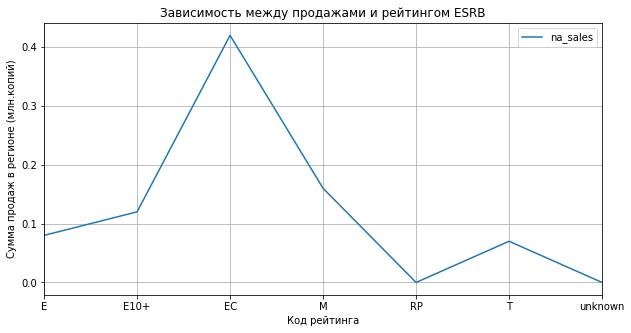

In [79]:
(
    na_users.pivot_table(index='rating', values='na_sales', aggfunc='median')
            .plot(figsize=(10,5), grid='True')
         )

plt.title('Зависимость между продажами и рейтингом ESRB')
plt.ylabel('Сумма продаж в регионе (млн.копий)')
plt.xlabel('Код рейтинга')
plt.show()

Лучше всего продаются игры с рейтингом:
- E10+ (для всех от 10 лет и старше);
- пик приходится на игры EC (для детей младшего возраста);
- чуть выше E10+ занимают позицию игры рейтинга М - содержащие материалы, не подходящие для подростков младше 17 лет.

### Пользователи в Европе

Сделаем срез и изучим данные по популярным платформам

In [80]:
#срез данных за актуальный период
eu_users = data.query('eu_sales >=0 & year_of_release >=2011')

In [81]:
#сгруппируем данные по платформам, суммируем продажи общие и по региону
top_eu_platforms = (
    eu_users.groupby('platform')
    .agg({'eu_sales' : 'sum', 'all_sales': 'sum'})
    .reset_index()
)

#посчитаем долю продаж по региону
top_eu_platforms['share_sales'] = top_eu_platforms['eu_sales'] / top_eu_platforms['all_sales'] * 100

#выведем 
display(top_eu_platforms.sort_values(by ='eu_sales', ascending=False)
                        .reset_index(drop=True)
                        .style.background_gradient('coolwarm', subset=['share_sales'])
       )

,platform,eu_sales,all_sales,share_sales
0,ps3,163.1,445.57,36.6048
1,ps4,141.09,314.14,44.9131
2,x360,117.1,380.38,30.785
3,3ds,61.27,257.81,23.7656
4,pc,56.7,97.68,58.0467
5,xone,51.59,159.32,32.3814
6,wii,29.6,95.02,31.1513
7,wiiu,25.13,82.19,30.5755
8,psv,13.07,53.81,24.2892
9,ds,9.24,38.73,23.8575


Топ-5 платформ среди пользователей Европы являются ps3, ps4, x360, 3ds, pc.<br>
В целом, по всем платформам, доли продаж среди европейских клиентов не велики:
- продажи ps3 составляют около 37% от общего объема продаж;
- с ps4 ситуация чуть лучше - 45% от общего числа;
- х360 составляет всего 30% суммарного количества (в отличие от 59% у северо-американцев);
- продажи 3ds составляют всего около 24% общемировых продаж.
Однако последняя по популярности среди европейцев - количество продаж игр для платформы обычных PC, составляет 58% от всех проданных копий игр для этой платформы.

Рассмотрим данные по жанрам за актуальный период

In [82]:
#сгруппируем данные по жанрам, суммируем продажи общие и по региону
top_eu_genres = (
    eu_users.groupby('genre')
    .agg({'eu_sales' : 'sum', 'all_sales': 'sum'})
    .reset_index()
)

#посчитаем долю продаж по региону
top_eu_genres['share_sales'] = top_eu_genres['eu_sales'] / top_eu_genres['all_sales'] * 100

#выведем 
display(top_eu_genres.sort_values(by ='eu_sales', ascending=False)
                        .reset_index(drop=True)
                        .style.background_gradient('coolwarm', subset=['share_sales'])
       )

,genre,eu_sales,all_sales,share_sales
0,action,199.12,557.8,35.6974
1,shooter,148.02,402.91,36.7377
2,sports,88.48,237.15,37.3097
3,role-playing,62.3,245.63,25.3634
4,racing,40.58,88.31,45.9518
5,misc,39.72,139.42,28.4895
6,platform,30.07,88.68,33.9084
7,simulation,19.72,50.26,39.236
8,fighting,16.24,66.9,24.275
9,adventure,13.96,45.04,30.9947


Топ-5 популярных жанров игр среди европейцев, в целом похожи на общемировую тенденцию. Однако доля общемировых продаж у них достаточно низкая и составляет в большинстве своем чуть больше трети общего количества проданных копий:
- Action - 35,7%
- Shooter - 36,7%
- Sports - 37,3%
- Role-playing - 25%

Замыкает топ-5 жанров жанр Racing (7 в общемировом рейтинге), доля продаж которого составла самый большой процент среди самых популярных европейских жанров - почти 46% от общемирового количества.

Оценим зависимость между рейтингом и продажами в конкретном регионе. <br>
Пропуски в данных были устранены на начальных этапах.<br>
Построим сводную таблицу, в которой посчитаем медианное значение продаж по каждому рейтингу, чтобы исключить влияние выбросов. И построим график.

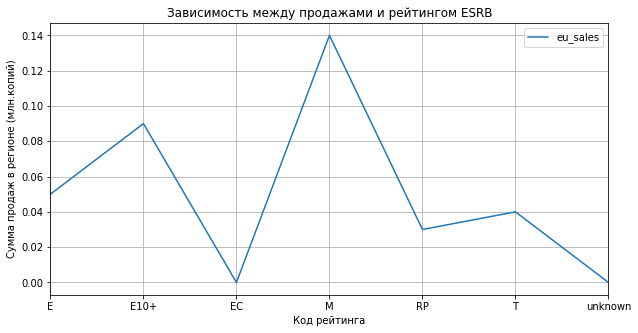

In [83]:
(
    eu_users.pivot_table(index='rating', values='eu_sales', aggfunc='median')
            .plot(figsize=(10,5), grid='True')
         )

plt.title('Зависимость между продажами и рейтингом ESRB')
plt.ylabel('Сумма продаж в регионе (млн.копий)')
plt.xlabel('Код рейтинга')
plt.show()

Среди пользователей Европы всего продаются игры с рейтингом:
- E и E10+ (для всех и от 10 лет и старше), игры для дошкольников (EC) находятся на нулевом уровне, с учетом количества продаваемых игр в выборке - возможно игры с таким рейтингом в Европе не продаются;
- пик приходится на игры для взрослых с рейтингом М;
- небольшое количество продаж приходится на игры для тинейджеров - рейтинг Т; 
- рейтинг RP ("ожидается") аналогичен замене unknown, которой мы заполняли пропуски. Его обычно присваивают демо-версиям. Следовательно, некоторая доля европейских пользователей, предпочитает играть в новейшие игры "раннего доступа".

### Пользователи в Японии

Сделаем срез и изучим данные по популярным платформам

In [84]:
#срез данных за актуальный период
jp_users = data.query('jp_sales >=0 & year_of_release >=2011')

In [85]:
#сгруппируем данные по платформам, суммируем продажи общие и по региону
top_jp_platforms = (
    jp_users.groupby('platform')
    .agg({'jp_sales' : 'sum', 'all_sales': 'sum'})
    .reset_index()
)

#посчитаем долю продаж по региону
top_jp_platforms['share_sales'] = top_jp_platforms['jp_sales'] / top_jp_platforms['all_sales'] * 100

#выведем 
display(top_jp_platforms.sort_values(by ='jp_sales', ascending=False)
                        .reset_index(drop=True)
                        .style.background_gradient('coolwarm', subset=['share_sales'])
       )

,platform,jp_sales,all_sales,share_sales
0,3ds,100.62,257.81,39.0287
1,ps3,49.39,445.57,11.0847
2,psp,24.04,29.01,82.868
3,psv,21.84,53.81,40.5873
4,ps4,15.96,314.14,5.08054
5,wiiu,13.01,82.19,15.8292
6,wii,8.97,95.02,9.44012
7,ds,8.04,38.73,20.7591
8,x360,3.35,380.38,0.880698
9,xone,0.34,159.32,0.213407


Топ-5 платформ среди пользователей Японии являются 3ds, ps3, psp, psv, ps4.<br>
Все платформы японских производителей. За исключением первой - все производства компании Playstation.
В целом, по всем платформам, доли продаж среди японских клиентов составляют:
- количество проданных игр у самой популярной у японских пользователей 3ds - составляет 39% от общемирового объема продаж;
- ps3 занимает 11%, а ps4 всего одну пятую долю от общего количества проданных игр;
- компьютерные игры (на платформе PC), совершенно невостребованы, доля их продаж равна 0;
- японцы предпочитают портативные консоли - 3ds, которая, как было сказано ранее, занимает первую строчку популярности, psv - 40% игр для нее продавалось в Японии за актуальный период(4 место в топ-5); второе место по популярности среди японцев и 83% от общемирового количества проданных игр составляют игры для платформы psp.

Рассмотрим данные по жанрам за актуальный период

In [86]:
#сгруппируем данные по жанрам, суммируем продажи общие и по региону
top_jp_genres = (
    jp_users.groupby('genre')
    .agg({'jp_sales' : 'sum', 'all_sales': 'sum'})
    .reset_index()
)

#посчитаем долю продаж по региону
top_jp_genres['share_sales'] = top_jp_genres['jp_sales'] / top_jp_genres['all_sales'] * 100

#выведем 
display(top_jp_genres.sort_values(by ='jp_sales', ascending=False)
                        .reset_index(drop=True)
                        .style.background_gradient('coolwarm', subset=['share_sales'])
       )

,genre,jp_sales,all_sales,share_sales
0,role-playing,79.87,245.63,32.5164
1,action,63.62,557.8,11.4055
2,misc,17.6,139.42,12.6237
3,fighting,12.38,66.9,18.5052
4,platform,12.13,88.68,13.6784
5,adventure,12.07,45.04,26.7984
6,shooter,11.92,402.91,2.95848
7,simulation,11.64,50.26,23.1596
8,sports,11.09,237.15,4.67637
9,racing,5.64,88.31,6.38659


Топ-5 популярных жанров игр среди японцев сильно отличается от аналогичных рейтингов для европейцев и северо-американцев.
- наиболее популярны игры в жанре Role-playing (32% от общемировых продаж, игры этого жанра в рейтинге по всем регионам занимают всего лишь 4 место);
- на второе место спустился жанр action (11% от общего объема продаж)
- на третьем месте misc (чаще он располагается чуть ниже в рейтинге, доля от суммы всех продаж составляет 12,6%)
- четвертое место у жанра fighting (в общемировом рейтинге он далеко на 8 строчке, доля от общего числа продаж составляет 18,5%)
- замыкает пятерку популярных жанров - platform (13,6 %, в других рейтингах этот жанр имеет примерно такую же популярность).
Предпочитаемые другими пользователями жанры shooter и sports в топ-популярных жанров у японских пользователей не попали и находятся ближе к концу списка.

Оценим зависимость между рейтингом и продажами в конкретном регионе. <br>
Пропуски в данных были устранены на начальных этапах.<br>
Построим сводную таблицу, в которой посчитаем медианное значение продаж по каждому рейтингу, чтобы исключить влияние выбросов. И построим график.

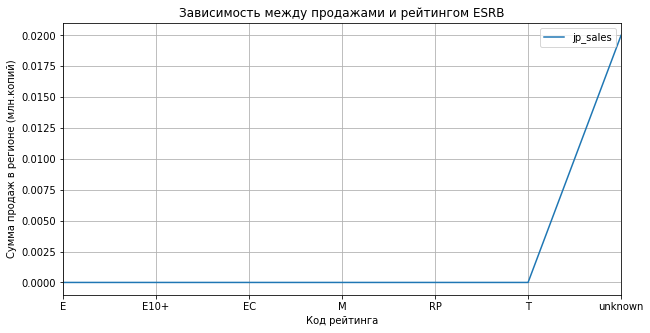

In [87]:
(
    jp_users.pivot_table(index='rating', values='jp_sales', aggfunc='median')
            .plot(figsize=(10,5), grid='True')
         )

plt.title('Зависимость между продажами и рейтингом ESRB')
plt.ylabel('Сумма продаж в регионе (млн.копий)')
plt.xlabel('Код рейтинга')
plt.show()

График показал медианные нулевые значения по всем рейтингам. Проверим по таблице.

In [88]:
jp_users.pivot_table(index='rating', values='jp_sales', aggfunc=['sum', 'mean', 'median'])

,sum,mean,median
,jp_sales,jp_sales,jp_sales
rating,,,
E,36.68,0.06,0.00
E10+,11.23,0.02,0.00
EC,0.00,0.00,0.00
M,26.14,0.04,0.00
RP,0.00,0.00,0.00
T,33.39,0.05,0.00
unknown,138.21,0.08,0.02


Медианные значения действительно равны нулю. Большее число родаж приходится именно на unknown. Скорее всего, в Японии собственная система рейтинга игрового контента - наибольшее число игр, проданных в Японии за актуальный период, имеет рейтинг unknown. Кроме того, большое количество консольных игр выходило только на японском языке и чаще не имеет перевода на английский и другие языки. Зависимости между рейтингом игрового продукта от ESRB и продажами игр среди японских пользователей не установлено.

### Выводы
<b> Популярные платформы</b><br>
- пользователи Северной Америки предпочитают как платформы производства Microsoft (xone, x360 - доля составляет 58,4% и 59,6% от суммы продаж игр по всем регионам соответственно); чуть менее популярны ps3 и ps4 (треть от всех продаж по всем регионам); единственная портативная консоль в топ-5 среди этих пользователей - 3ds (также треть от продаж);
- европейские пользователи более разносторонни - на первых местах рейтинга ps3, ps4 (37% и 45% соотвестенно), далее идет x360 (всего треть от суммы всех продаж), 3ds четвертая в списке популярности (доля составляет 24%), при этом европейцы покупаю игры также для PC и являются достаточно многочисленной группой стронников этой платформы (на них приходится 58% общемировых продаж)
- японские пользователи отдают предпочтение японским консолям, в топе самых популярных - продукты от Playstation: ps3, psp, psv, ps4. В целом, японские пользователи больше предпочитают портативные консоли (3ds, первое место в рейтинге, доля от общемирового объема - 39%; psp, второе место в рейтинге, 83% продаваемых в мире игр для этой платформы, приходится на японских пользователей и psv, четвертое место, доля составляет 40%). Остальные - ps3 занимает 11%, а ps4 всего одну пятую долю от общего количества проданных игр. 

<b>Жанры</b> 
- пользователи Северной Америки предпочитают игры в жанре Action (40% общемировых продаж игр этого жанра); Shooter (48% общего объема проданных игр); Sports (45% от общего количества проданных игр); Role-playing (34% общего объема продаж); Misc (почти половина общемировых продаж). Их предпочтения близки к общей тенденции по всему объему продаж игр разных жанров в мире.
- европейские пользователи предпочитают схожий набор по всем жанрам - доля около трети-четверти от общего объема продаж: Action - 35,7%, Shooter - 36,7%, Sports - 37,3%, Role-playing - 25%.
- японские пользователи сильно отличаются от предыдущих групп по своим предпочтениям и крайне далеки от общемировой тенденции: у них наиболее популярны игры в жанре Role-playing (32% от общемировых продаж), Action (11% от общего объема продаж), misc (12,6%), Fighting (18,5%, чаще он расплогается в конце списка популярности), Platform (13,6 %). 

<b>Рейтинги</b>
- в Северной Америке наиболее популярны игры для детей с рейтингом EC (для детей младшего возраста), далее идут игры с возрастным ограничением в 10+ (E10+) и игры рейтинга М (для взрослых, 18+).
- европейские пользователи предпочитают игры для детей чуть постарше - E и E10+ (для всех и от 10 лет и старше), однако пик популярности (в отличие от северо-американских пользователей) у игр с максимальным возрастным рейтингом М.
- японские пользователи, вероятно используют свою систему рейтингов, многие игры для консолей Playstation выпускаются только на японском языке (скорее всего у ESRB не было необходимости оценивать игры, выпущенные для локального рынка), зависимость между рейтингами западной ассоциации ESRB и предпочтенями японских пользователей не установлена.

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC

Проверим различаются ли средние пользовательские рейтинги у платформ Xbox One и PC.<br>Посчитаем дисперсию для средних значений. Дисперсия — это величина, показывающая, как именно и насколько сильно разбросаны значения —оценки пользователей за рассматриваемый период. За точку, относительно которой эти значения разбросаны, возьмем среднее арифметическое.

In [89]:
#сделаем выборочный срез
xone_pc_user_score = data.query('2015 >= year_of_release >= 2011 & (platform == "xone" or platform == "pc")')

In [90]:
#построим сравнительную таблицу по среднему, стандартному отклонению, дисперсии
compare_platforms = {
    'platform' : ['Xbox One', 'PC'],
    
    'mean_user_score': [xone_pc_user_score.loc[xone_pc_user_score['platform'] == 'xone']['user_score'].mean(),
                        xone_pc_user_score.loc[xone_pc_user_score['platform'] == 'pc']['user_score'].mean()],
    
    'standard_deviation': [np.std(xone_pc_user_score.loc[xone_pc_user_score['platform'] == 'xone']['user_score'], ddof=1),
                           np.std(xone_pc_user_score.loc[xone_pc_user_score['platform'] == 'pc']['user_score'], ddof=1)],
    
    'varians': [np.var(xone_pc_user_score.loc[xone_pc_user_score['platform'] == 'xone']['user_score'], ddof=1),
                np.var(xone_pc_user_score.loc[xone_pc_user_score['platform'] == 'pc']['user_score'], ddof=1)]

}

pd.DataFrame(compare_platforms)

,platform,mean_user_score,standard_deviation,varians
0,Xbox One,6.48,1.29,1.66
1,PC,6.48,1.59,2.53


Средние значения разные. Предположим, что это действительно так.

Проведем статистический анализ при помощи t-теста, т.к. будем сравнивать две выборки - средние рейтинги игр на двух платформах, а объем выборки больше 50 элементов.

Перед проведением статистического теста необходимо очистить выборки от выбросов.

In [91]:
print('Пропусков в оценках пользователей:', xone_pc_user_score['user_score'].isna().sum())
print('Всего строк в таблице:', xone_pc_user_score.shape[0], 'строк')

Пропусков в оценках пользователей: 117
Всего строк в таблице: 495 строк


In [92]:
#данных достаточно, можно удалить пропуски
xone_pc_user_score = xone_pc_user_score.dropna(subset=['user_score'])

print('Пропусков в оценках пользователей после:', xone_pc_user_score['user_score'].isna().sum())
print('Объем новой таблицы:', xone_pc_user_score.shape[0], 'строк')

Пропусков в оценках пользователей после: 0
Объем новой таблицы: 378 строк


Сформулируем нулевую и альтернативную гипотезу. По правилам статистических тестов всегда сравниваем с равенством:

H0: Средние пользовательские рейтинги у платформы Xbox One равны средним пользовательским рейтингам у платформы PC<br>
H1: Средние пользовательские рейтинги у платформы Xbox One не равны средним пользовательским рейтингам у платформы PC<br>

In [93]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    xone_pc_user_score.loc[xone_pc_user_score['platform'] == 'xone']['user_score'], 
    xone_pc_user_score.loc[xone_pc_user_score['platform'] == 'pc']['user_score'],
    equal_var = False) # проверяем гипотезу о равенстве выручек с учетом того, что выборки разные по размеру

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.9966109146811735
Не получилось отвергнуть нулевую гипотезу


На основании сравнения рассчитаного математического ожидания, рассчитаных стандартного отклонения и дисперсии, а также основываясь на результатах статистического t-теста, на уровне значимости alpha = 0.05, отвергаем гипотезу о равенстве средних пользовательских оценок у платформ xone и pc. Вероятно, средние пользовательские оценки у платформы PC действительно выше, чем у Xbox One.

### Средние пользовательские рейтинги рейтинги жанров Action и Sports

Проверим различаются ли средние пользовательские рейтинги у жанров Action и Sports. <br>
Посчитаем дисперсию для средних значений. Дисперсия — это величина, показывающая, насколько далеко каждая оценка пользователей от среднего значения оценок по жанру за рассматриваемый период. За точку, относительно которой эти значения разбросаны, возьмем математическое ожидание (среднее арифметическое).

In [94]:
#сделаем выборочный срез
action_sport_user_score = data.query('2015 >= year_of_release >= 2011 & (genre == "action" or genre == "sports")')

In [95]:
#построим сравнительную таблицу
compare_genres =  {
    'genre' : ['Action', 'Sports'],
    
    'mean_user_score': [action_sport_user_score.loc[action_sport_user_score['genre'] == 'action']['user_score'].mean(),
                        action_sport_user_score.loc[action_sport_user_score['genre'] == 'sports']['user_score'].mean()],
    
    'standard_deviation': [np.std(action_sport_user_score.loc[action_sport_user_score['genre'] == 'action']['user_score'], ddof=1),
                           np.std(action_sport_user_score.loc[action_sport_user_score['genre'] == 'sports']['user_score'], ddof=1)],
    
    'varians': [np.var(action_sport_user_score.loc[action_sport_user_score['genre'] == 'action']['user_score'], ddof=1),
                np.var(action_sport_user_score.loc[action_sport_user_score['genre'] == 'sports']['user_score'], ddof=1)]

}
pd.DataFrame(compare_genres)

,genre,mean_user_score,standard_deviation,varians
0,Action,6.80,1.33,1.76
1,Sports,5.69,1.63,2.66


Средние значения отличаются несущественно. Проверим, так ли это - проведем статистический анализ при помощи t-теста, т.к. будем сравнивать две выборки - средние пользовательские рейтинги игр двух жанров, а объем выборки больше 50 элементов.

Перед проведением статистического теста необходимо очистить выборки от выбросов.

In [96]:
print('Пропусков в оценках пользователей:', action_sport_user_score['user_score'].isna().sum())
print('Всего строк в таблице:', action_sport_user_score.shape[0], 'строк')

Пропусков в оценках пользователей: 644
Всего строк в таблице: 1432 строк


In [97]:
#данных достаточно, можно удалить пропуски
action_sport_user_score = action_sport_user_score.dropna(subset=['user_score'])

print('Пропусков в оценках пользователей после:', action_sport_user_score['user_score'].isna().sum())
print('Объем новой таблицы:', action_sport_user_score.shape[0], 'строк')

Пропусков в оценках пользователей после: 0
Объем новой таблицы: 788 строк


Сформулируем нулевую и альтернативную гипотезу. По правилам статистических тестов всегда сравниваем с равенством:

H0: Средние пользовательские рейтинги игр в жанре Action равны средним пользовательским рейтингам игр в жанре Sports<br>
H1: Средние пользовательские рейтинги игр в жанре Action не равны средним пользовательским рейтингам игр в жанре Sports<br>

In [98]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
    action_sport_user_score.loc[action_sport_user_score['genre'] == 'action']['user_score'], 
    action_sport_user_score.loc[action_sport_user_score['genre'] == 'sports']['user_score'],
    equal_var = False) # проверяем гипотезу о равенстве выручек с учетом того, что выборки разные по размеру

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  9.049636834937507e-17
Отвергаем нулевую гипотезу


основании сравнения рассчитаного математического ожидания, рассчитаных стандартного отклонения и дисперсии, а также основываясь на результатах статистического t-теста, на уровне значимости alpha = 0.05, не можем отвергнуть гипотезу о равенстве средних пользовательских оценок у игр в жанре action и sports. Вероятно, наблюдаемое различие средних пользовательских оценок у игр в жанре action и sports не существено и вызвано каким-либо выбросом или шумом в данных.

## Общий вывод

- на начальном этапе данные были специально подготовлены для дальнейшего анализа, так как брались из открытых разных источников: были удалены пропуски в названиях игр, жанрах; пропуски в оценках оставлены (этот факт учтен в дальнейшем анализе), т.к. корректно заменить их было нельзя; пропуски в рейтингах заменены на unknown (т.к. игры, возможно, просто не попали в выбранную систему рейтингов); значения tbn в оценках заменены на NaN (как неоцененные);
- для каждой игры отдельном столбце посчитана сумма продаж по всем регионам;
- наибольшее число выпущенных игр лежит в диапазоне 2005-2012 годов;
- проведен анализ продаж игр на платформах ps2, x360, ps3, wii, ds, ps, как консолях с наибольшим проданным числом игр;
- установлено, что средняя длительность жизни платформы составляет около 10 лет;
- актуальным периодом для анализа выбран 5-летний (половина жизненного цикла платформы, когда продажи увеличиваются) период (начиная с 2011 года), верхней границей взят 2015 год, т.к. за 2016 год данные не полные;
- <b>для одинакового количества выпущенных игр наблюдается существенная разница в сумме продаж (например, игр для ps3 и для psv выпущено в 2014 году почти одинаковое количество, однако копий игр для ps3 продано больше, чем для psv), кроме того, суммарные продажи по годам позволяют отследить рост популярности новой консоли - при меньшем количестве выпущенных игр (или несущественной разнице между ними), продажи игр для новой консоли зачастую выше</b>;
- в выбранный актуальный период определены перспективные игровые платформы (3ds, psv, pc, ps4, xone) у которых продажи имеют тенденцию к росту с учетом вышеперечисленных причин;
- установлено, что для каждой платформы есть ряд игр, продажи которых принесли больше медианного значения - <b> бестселлеры, которые могут существенно повлиять на успех игр определенной консоли у покупателей</b>;
- медианные значения продаж по платформам лежат в пределах около 0,25 млн.копий и менее;
- лидеры по продажам - игры для ps4 и xbox one;
- проведен корреляционный анализ между оценками критиков, пользователей и объемами продаж игр во всех регионах, установлено, что существует чаще всего умеренная положительная зависимость между оценками критиков и объемом продаж, а оценки пользователей на продажи игр практически не влияют;
- наиболее востребованы у пользователей игры в жанре action, sports, shooter, наименее востребованы стратегии,
<b>при этом, среди игр в жанре action больше всего успешных продуктов, что сказывается на высокой сумме продаж игр этого жанра (медианные продажи, при этом, не настолько высоки);
- судя по медианным продажам, можно предположить, что ожидаемо стабильно продаются игры в жанрах fighting и platform, хотя их выпущено не очень много; </b>    
- проведен анализ поведения пользователей в Серверной Америке, Европе, Японии:
  - в целом, по всем пользователям подтверждается тенденция популярности платформ, полученная на предыдущем этапе: пользователи Северной Америки отдают предпочтение платформам производства Microsoft (на этих пользователей приходится больше половины мировоых продаж консолей x360 и xone); европейцы не отдают предпочтений конкретным производителям, покупая игры для Playstation и Xbox разных поколений, а также для обычных ПК (доля продаж игр этой категории составляет 58% от общего объема продаж по всем регионам); японские пользователи выбирают отечественных производителей Nintendo и Playstation, отдавая предпотение портативным консолям (83% мировых продаж игр для psp);
  - северо-американские и европейские пользователи схожи в жанровых предпочтениях: зачастую они выбирают игры в жанре Action (40% и 35,7% общемировых продаж соотвественно), а также Sports (45% и 37,3%), Shooter (48% и 36,7%), японские же пользователи выбирают игры в жанре Role-playing (32% от общемировых продаж) и Fighting, который в общемировых предпочтениях располагается практически внизу списка популярности.
  - североамериканские и европейские пользователи часто покупают игры для детей (с рейтингом E, E10+); однако европейские пользователи отдают предпочтение играм рейтинга 18+ (в Севереной Америке преобладает детский контент), для японских пользователей зависимость между рейтингами западной ассоциации ESRB и продажами игр не установлена (вероятно, в Японии существует свой внутренний рейтинг оценки, кроме того, многие игры выпускаются только на японском языке и не попадают на мировой рынок).
- при помощи статистического теста проверена гипотеза о равенстве средних пользовательских рейтингов для платформ Xbox One и PC, которую принять не получилось: средние пользовательские оценки игр двух платформ различны, расчет t-критерия так же говорит об этом;
- при помощи статистического теста проверена гипотеза о равенстве средних пользовательских рейтингов для игр в жанрах Action и Sports, которая принимается на уровне значимости alpha = 0.05, средние оценки двух жанров имеют тенденцию к равенству, которое может незначительно искажаться выбросами (успехами отдельных игровых продуктов).

Таким образом, в 2017 перспективнее всего закупать для реализации игры в жанрах Action, Sport для платформ PC, PS4, Xbox One, psv, 3ds, с высокими оценками от профессиональных игровых критиков, и рейтингами E10+ и M (если вести речь о европейком рынке сбыра игровой продукции). Для компьютерных игр лучше обратить внимание также на пользовательские рейтинги.